<a href="https://colab.research.google.com/github/Sowmya-2348562/Deep-Learning/blob/main/2348562_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


1)
---



In [2]:
import numpy as np

# Define the revenue function
def revenue_function(w):
    return 0.5 * w**2 - 30 * w + 100

# Define the derivative of the revenue function
def revenue_derivative(w):
    return w - 30

# Momentum-based optimization algorithm
def momentum_optimization(initial_w, learning_rate, momentum, iterations):
    w = initial_w
    previous_w = 0
    for i in range(iterations):
        gradient = revenue_derivative(w)
        w_new = w - (learning_rate * gradient + momentum * (w - previous_w))
        previous_w = w
        w = w_new
        revenue = revenue_function(w)
        print(f"Iteration {i+1}: Price = {w}, Revenue = {revenue}")
            # Print the optimal price
    print(f"Optimal Price: {w}")


# Parameters
initial_price = 20
learning_rate = 0.1
momentum = 0.9
num_iterations = 3

# Perform momentum-based optimization
momentum_optimization(initial_price, learning_rate, momentum, num_iterations)


Iteration 1: Price = 3.0, Revenue = 14.5
Iteration 2: Price = 21.0, Revenue = -309.5
Iteration 3: Price = 5.700000000000001, Revenue = -54.755000000000024
Optimal Price: 5.700000000000001


2)

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

In [35]:
# Load and preprocess the dataset
df = pd.read_csv('/content/breast-cancer.csv')

In [36]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [37]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [39]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [40]:
df.shape

(569, 32)

In [41]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [42]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Target Columns:

diagnosis

whether tumor is malignant or benign
Malignant is cancerous while benign is not. : not much imbalance is there so not needed.

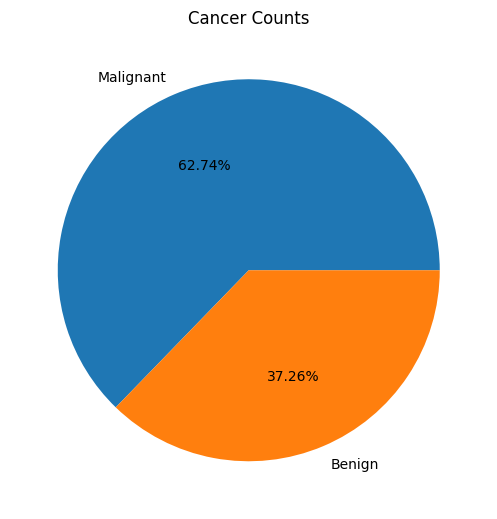

In [43]:

diag = data["diagnosis"].value_counts()
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.pie(diag, labels=["Malignant", "Benign"], autopct="%.2f%%")
plt.title("Cancer Counts")
plt.tight_layout()
plt.show()

In [44]:
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [45]:
df.dtypes

id                           int64
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Training and Testing

In [46]:
X = df.drop(columns=['diagnosis', 'id'])
y = df['diagnosis']

# training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l1(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid'))

model2 = Sequential()
model2.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dense(1, activation='sigmoid'))

model3 = Sequential()
model3.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model3.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model3.add(Dense(1, activation='sigmoid'))

#Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
#model training
mt = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
12/12 [==============================] - 1s 15ms/step - loss: 5.0199 - accuracy: 0.7143 - val_loss: 4.5951 - val_accuracy: 0.9341
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 4.3466 - accuracy: 0.9368 - val_loss: 4.0486 - val_accuracy: 0.9451
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 3.8292 - accuracy: 0.9533 - val_loss: 3.5747 - val_accuracy: 0.9560
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 3.3697 - accuracy: 0.9615 - val_loss: 3.1447 - val_accuracy: 0.9560
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 2.9504 - accuracy: 0.9725 - val_loss: 2.7508 - val_accuracy: 0.9560
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 2.5671 - accuracy: 0.9753 - val_loss: 2.3888 - val_accuracy: 0.9560
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 2.2160 - accuracy: 0.9808 - val_loss: 2.0591 - val_accuracy: 0.9670
Epoch 8/100


In [50]:
mt2 = model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
12/12 [==============================] - 1s 13ms/step - loss: 1.8067 - accuracy: 0.8132 - val_loss: 1.5279 - val_accuracy: 0.9670
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 1.4180 - accuracy: 0.9560 - val_loss: 1.2961 - val_accuracy: 0.9670
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 1.2193 - accuracy: 0.9560 - val_loss: 1.1359 - val_accuracy: 0.9780
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 1.0663 - accuracy: 0.9670 - val_loss: 1.0047 - val_accuracy: 0.9670
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.9384 - accuracy: 0.9835 - val_loss: 0.8957 - val_accuracy: 0.9780
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 0.8271 - accuracy: 0.9863 - val_loss: 0.7965 - val_accuracy: 0.9780
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.7308 - accuracy: 0.9863 - val_loss: 0.7097 - val_accuracy: 0.9780
Epoch 8/100


In [51]:
mt3 = model3.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
12/12 [==============================] - 1s 17ms/step - loss: 12.4020 - accuracy: 0.5302 - val_loss: 11.4701 - val_accuracy: 0.9231
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 10.8357 - accuracy: 0.9286 - val_loss: 10.0366 - val_accuracy: 0.9560
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 9.4601 - accuracy: 0.9478 - val_loss: 8.7300 - val_accuracy: 0.9341
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 8.1946 - accuracy: 0.9615 - val_loss: 7.5262 - val_accuracy: 0.9451
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 7.0371 - accuracy: 0.9643 - val_loss: 6.4271 - val_accuracy: 0.9451
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 5.9800 - accuracy: 0.9670 - val_loss: 5.4327 - val_accuracy: 0.9451
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 5.0296 - accuracy: 0.9698 - val_loss: 4.5391 - val_accuracy: 0.9670
Epoch 8/

Model Metrics

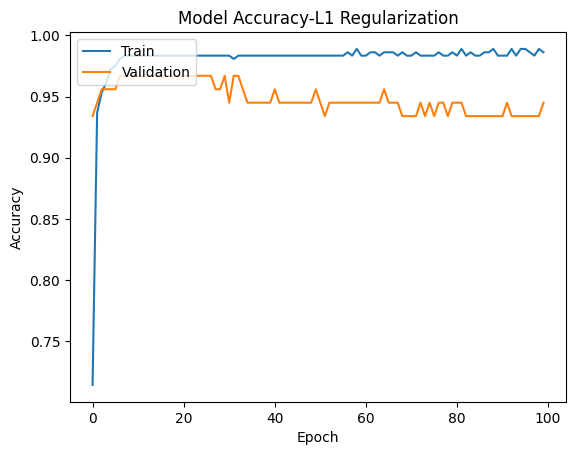

In [52]:
plt.plot(mt.history['accuracy'])
plt.plot(mt.history['val_accuracy'])
plt.title('Model Accuracy-L1 Regularization')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

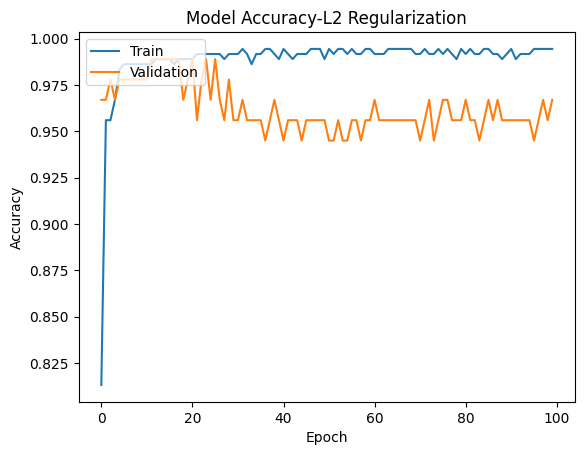

In [53]:
plt.plot(mt2.history['accuracy'])
plt.plot(mt2.history['val_accuracy'])
plt.title('Model Accuracy-L2 Regularization')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

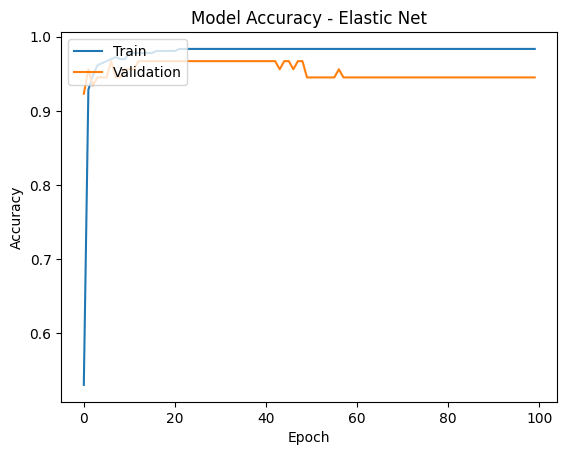

In [54]:
plt.plot(mt3.history['accuracy'])
plt.plot(mt3.history['val_accuracy'])
plt.title('Model Accuracy - Elastic Net')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [55]:
#model 1
y_probs = model.predict(X_test)
y_pred = (y_probs > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cf = confusion_matrix(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)

4/4 [==============================] - 0s 2ms/step


In [56]:
#model 2
y_probs2 = model2.predict(X_test)
y_pred2 = (y_probs2 > 0.5).astype(int)
accuracy2 = accuracy_score(y_test, y_pred)
precision2 = precision_score(y_test, y_pred)
recall2 = recall_score(y_test, y_pred)
f12 = f1_score(y_test, y_pred)
cf2 = confusion_matrix(y_test, y_pred)
fpr2, tpr2, thresholds2 = roc_curve(y_test, model2.predict(X_test))
roc_auc2 = auc(fpr2, tpr2)

4/4 [==============================] - 0s 2ms/step


In [57]:
#model 3
y_probs3 = model3.predict(X_test)
y_pred3 = (y_probs3 > 0.5).astype(int)
accuracy3 = accuracy_score(y_test, y_pred)
precision3 = precision_score(y_test, y_pred)
recall3 = recall_score(y_test, y_pred)
f13 = f1_score(y_test, y_pred)
cf3 = confusion_matrix(y_test, y_pred)
fpr3, tpr3, thresholds3 = roc_curve(y_test, model3.predict(X_test))
roc_auc3 = auc(fpr3, tpr3)

4/4 [==============================] - 0s 2ms/step


In [58]:
print("L1 Regularization")
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 Score: ",f1)

print("\nL2 Regularization")
print("Accuracy: ",accuracy2)
print("Precision: ",precision2)
print("Recall: ",recall2)
print("F1 Score: ",f12)

print("\nElastic Net")
print("Accuracy: ",accuracy3)
print("Precision: ",precision3)
print("Recall: ",recall3)
print("F1 Score: ",f13)

L1 Regularization
Accuracy:  0.9736842105263158
Precision:  0.9761904761904762
Recall:  0.9534883720930233
F1 Score:  0.9647058823529412

L2 Regularization
Accuracy:  0.9736842105263158
Precision:  0.9761904761904762
Recall:  0.9534883720930233
F1 Score:  0.9647058823529412

Elastic Net
Accuracy:  0.9736842105263158
Precision:  0.9761904761904762
Recall:  0.9534883720930233
F1 Score:  0.9647058823529412


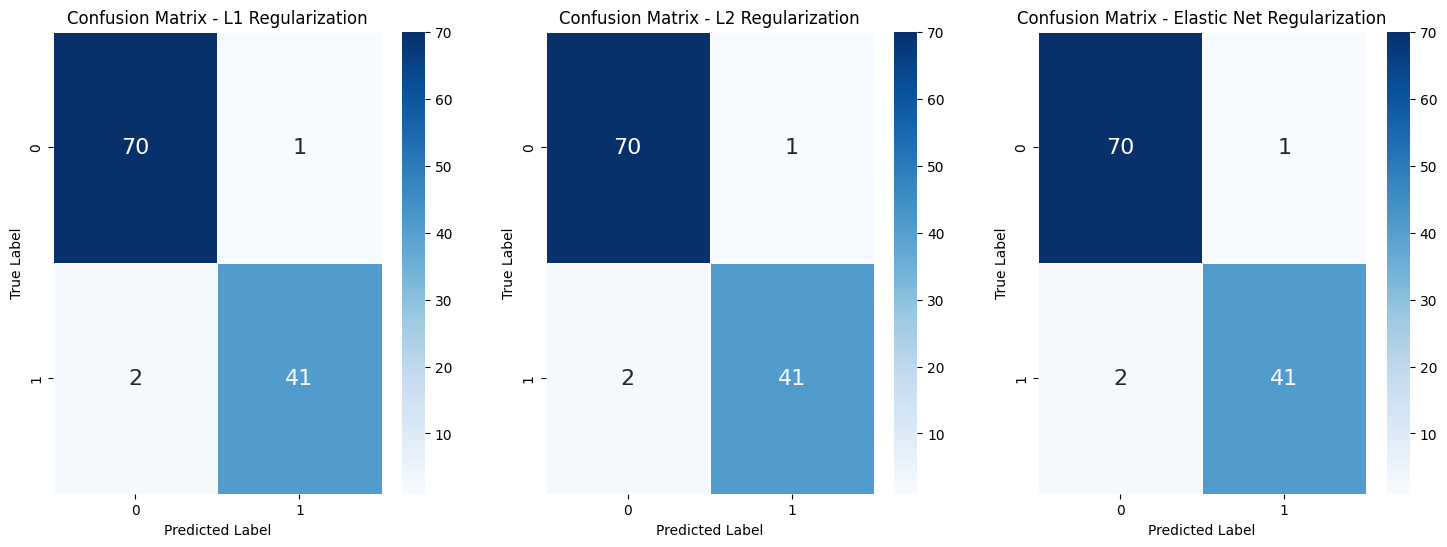

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# L1 Regularization
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues', linewidths=.5, annot_kws={"size": 16}, ax=axes[0])
axes[0].set_title('Confusion Matrix - L1 Regularization')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# L2 Regularization
sns.heatmap(cf2, annot=True, fmt='d', cmap='Blues', linewidths=.5, annot_kws={"size": 16}, ax=axes[1])
axes[1].set_title('Confusion Matrix - L2 Regularization')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

# Elastic Net
sns.heatmap(cf3, annot=True, fmt='d', cmap='Blues', linewidths=.5, annot_kws={"size": 16}, ax=axes[2])
axes[2].set_title('Confusion Matrix - Elastic Net Regularization')
axes[2].set_xlabel('Predicted Label')
axes[2].set_ylabel('True Label')

plt.show()

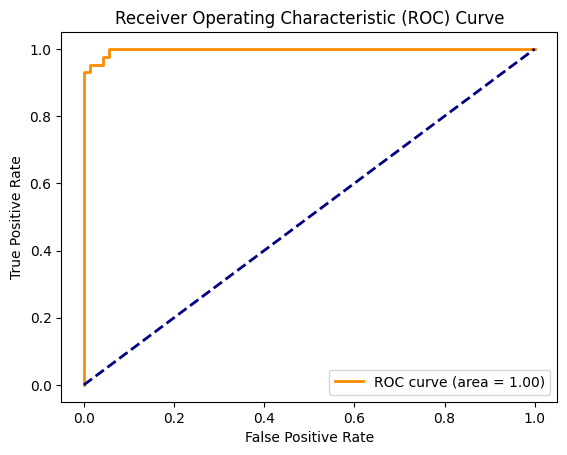

In [60]:
# ROC Curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

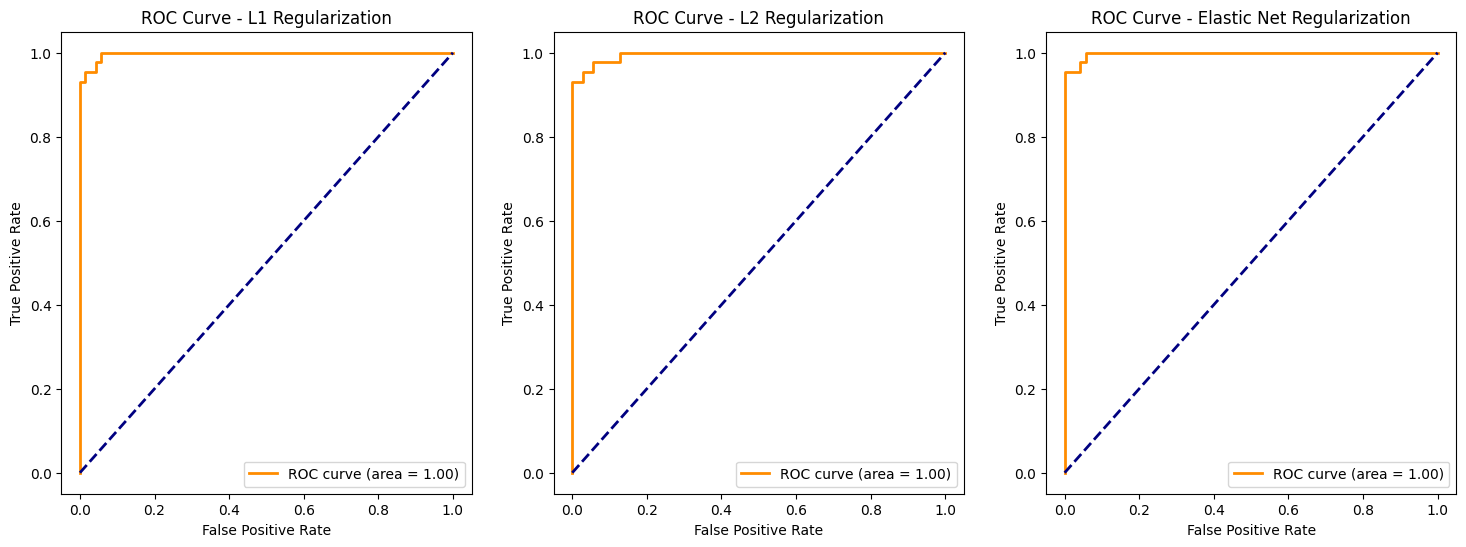

In [61]:
plt.figure(figsize=(18, 6))

# L1 Regularization
plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - L1 Regularization')
plt.legend(loc='lower right')

# L2 Regularization
plt.subplot(1, 3, 2)
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - L2 Regularization')
plt.legend(loc='lower right')

# Elastic Net
plt.subplot(1, 3, 3)
plt.plot(fpr3, tpr3, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Elastic Net Regularization')
plt.legend(loc='lower right')

plt.show()

As a result of the high number of epochs (100), all three of our models have achieved roughly equivalent accuracy. Their confusion matrix values also indicate an alignment. Based on these observations, it can be inferred that the models exhibit similar accuracy, with the disparity lying in the iterations at which they achieve this performance.